In [171]:
#!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [177]:
# CSVファイルの読み込み
data_file = "./../titanic/train.csv"
df = pd.read_csv(data_file)

# 分析クラスの作成

In [ ]:
class DataAnalyzer():
        def __init__()
            pass
        
        
        def set_model()
            # Light GBM、RF、XGBに対応したい。
            pass
        def set_model_params()
            pass
        def set_features()
            pass
        def get_model_config()
            pass
        def count_training_time()
            pass
        def count_estimating_time()
            pass
        
        


# データの概要 

## データの中身

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.size, df.dtypes

(10692,
 PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Ticket          object
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object)

In [ ]:
## 各カラムの基本統計量

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       178
FamilySize       0
FareGroup        0
HasCabin         0
Title            0
CabinGroup       0
dtype: int64

In [178]:
col = ["Survived", "Pclass", "Sex", "Embarked"]
for c in col:
    print(c, df[c].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Embarked ['S' 'C' 'Q' nan]


In [50]:
target_col = "Age"
df.sort_values(target_col).head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
764,765,0,3,"Eklund, Mr. Hans Linus",male,16.00,0,0,347074,7.7750,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.00,0,0,110152,86.5000,B79,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.00,0,0,35851,7.7333,NaN,Q


## 各カラムの説明

PassengerId: 乗客ID
Survived: 生存フラグ (1は生存、0は死亡)
Pclass: 乗客のチケットクラス、社会経済的地位（1 = 1等級、2 = 2等級、3 = 3等級）
Name: 乗客の氏名
Sex: 乗客の性別
Age: 乗客の年齢 (一部の乗客の年齢は推測値)
SibSp: 乗客が船上で一緒に旅行していた兄弟姉妹や配偶者の数
Parch: 乗客が船上で一緒に旅行していた親や子供の数
Ticket: 乗客のチケット番号
Fare: 乗客がチケットに支払った料金
Cabin: 乗客が宿泊した船室の番号
Embarked: 乗客が乗船した港を示します（C = Cherbourg, Q = Queenstown, S = Southampton）

## 欠損値

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


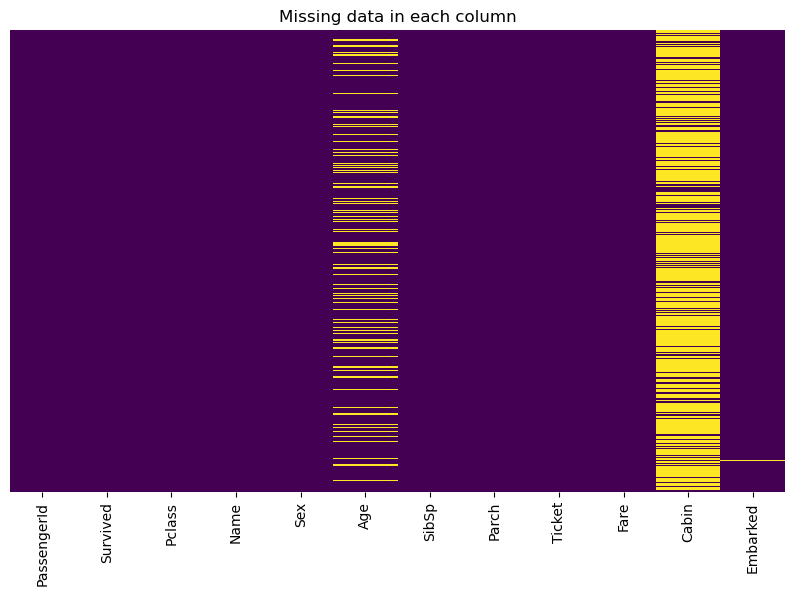

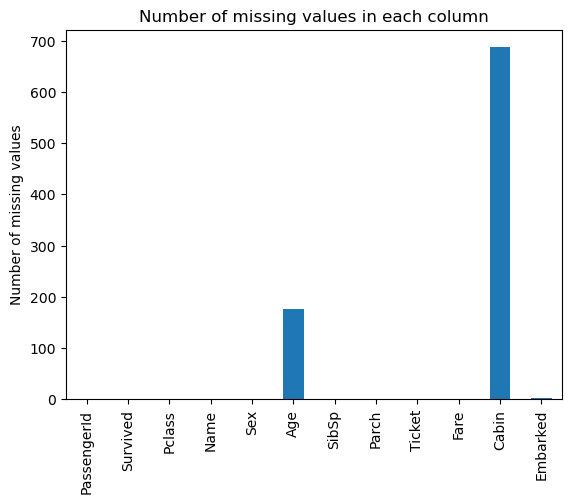

In [99]:
# 各カラムの欠損値の数を計算
missing_values = df.isnull().sum()

# 欠損値の数を表示
print(missing_values)

# 欠損値の可視化
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing data in each column')
plt.show()

# 棒グラフで表示
missing_values.plot(kind='bar')
plt.title('Number of missing values in each column')
plt.ylabel('Number of missing values')
plt.show()

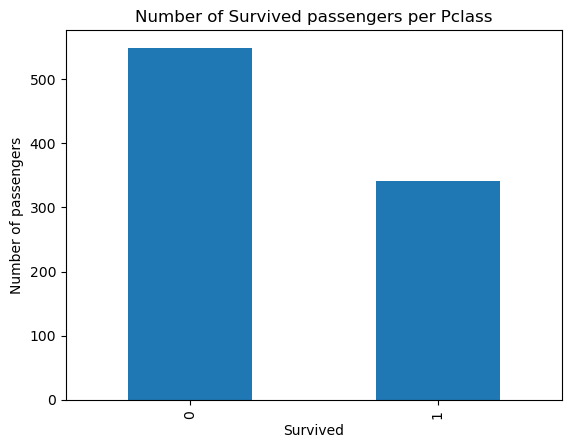

In [86]:
survived_count = df['Survived'].value_counts()
survived_count.plot(kind='bar')
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

# 男性(or女性)が世帯持ちか否かと生存率の関係

In [1]:
target_sex = "female"
# PclassごとにSurvivedのデータ数を集計
df_male = df[df['Sex'] == target_sex]
survived_count = df_male.groupby('SibSp')['Survived'].value_counts()

# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per SibSp')
plt.ylabel('Proportion of passengers')
plt.show()


# PclassごとにSurvivedのデータ数を集計
df_male = df[df['Sex'] == target_sex]
survived_count = df_male.groupby('Parch')['Survived'].value_counts()

# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per SibSp')
plt.ylabel('Proportion of passengers')
plt.show()

NameError: name 'df' is not defined

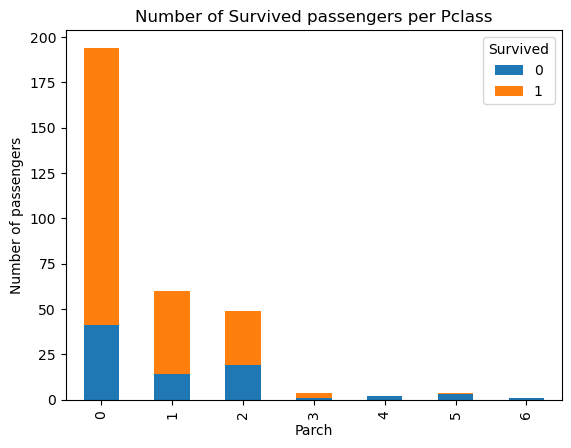

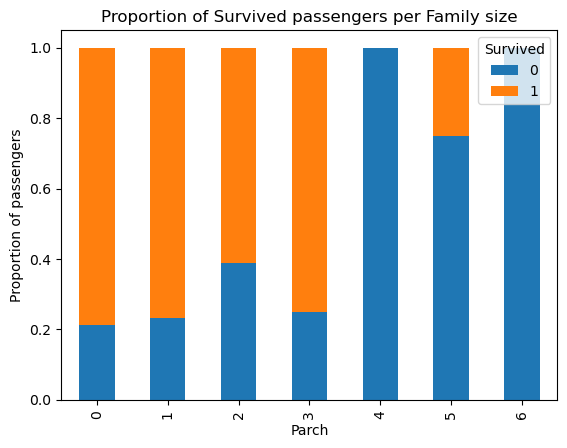

In [73]:
df_fam = df.copy()
df_fam["family_size"] = df['Parch'] + df['SibSp']


# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Family size')
plt.ylabel('Number of passengers')
plt.show()

# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per Family size')
plt.ylabel('Proportion of passengers')
plt.show()

# Fareと生存率の関係

<Axes: >

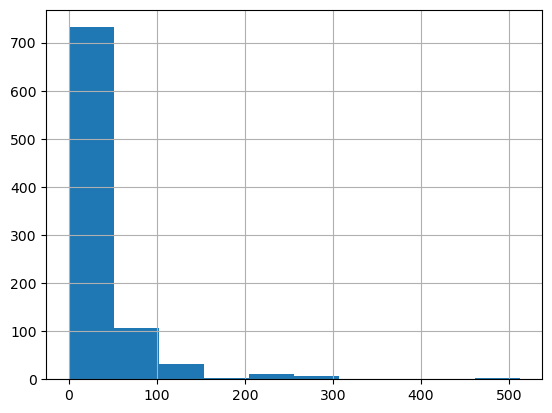

In [112]:
df["Fare"].hist()

In [70]:
df.columns
def show_hist(column,  bins = 5, ratio = True, fillna = True, set_bins = None):
        tdf = df.copy()
        if fillna:
            tdf[column] = tdf[column].fillna( -100)
            
        if set_bins:
            tdf['Group'] = pd.cut(df[column], bins = set_bins)
        else:
            tdf['Group'] = pd.cut(df[column], bins = bins)
        #plt.hist(tdf['Group'])
        survived_count = tdf.groupby('Group')['Survived'].value_counts()
        # 棒グラフで表示
        if ratio: 
            survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)
            survived_ratio.plot(kind='bar', stacked=True)
        else:
            survived_count.unstack().plot(kind='bar', stacked=True)
        plt.show()

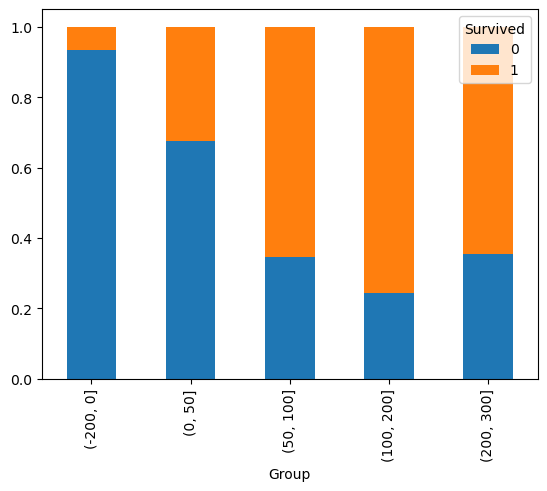

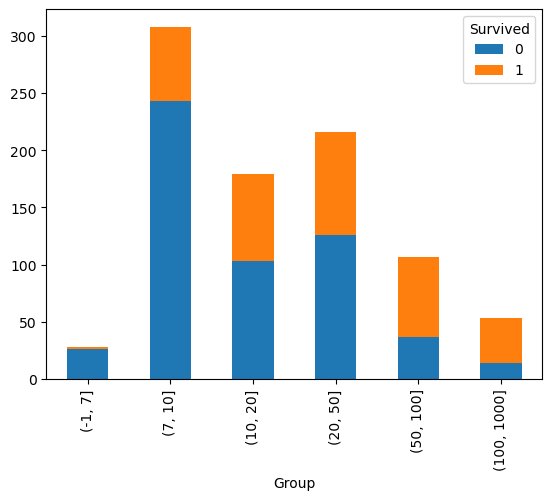

In [113]:
show_hist("Fare",  bins = 10, ratio = True, set_bins = [-200, 0, 50, 100, 200, 300]) 
show_hist("Fare",  bins = 100, ratio = False, set_bins = [-1, 7, 10, 20, 50, 100, 1000]) 

In [ ]:
#Fare

target_sex = "female"
# PclassごとにSurvivedのデータ数を集計
df_male = df[df['Sex'] == target_sex]
survived_count = df_male.groupby('SibSp')['Survived'].value_counts()

# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per Pclass')
plt.ylabel('Proportion of passengers')
plt.show()

## チケットクラスごとの生存数と生存率

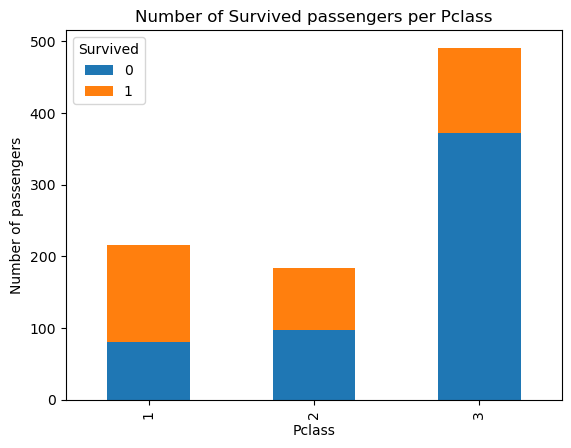

In [22]:

# PclassごとにSurvivedのデータ数を集計
survived_count = df.groupby('Pclass')['Survived'].value_counts()

# 棒グラフで表示
survived_count.unstack().plot(kind='bar', stacked=True)
plt.title('Number of Survived passengers per Pclass')
plt.ylabel('Number of passengers')
plt.show()

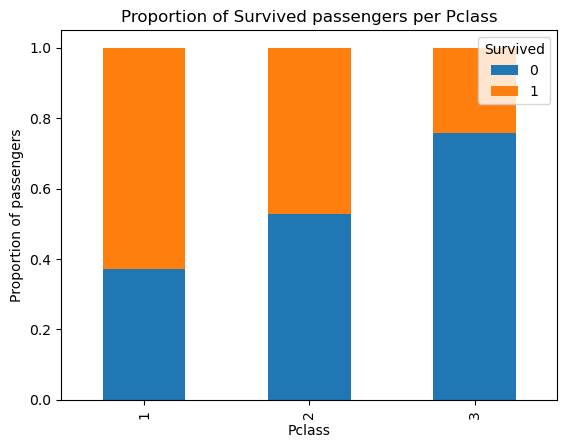

In [17]:
# 各Pclassの乗客数で正規化して割合を計算
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per Pclass')
plt.ylabel('Proportion of passengers')
plt.show()

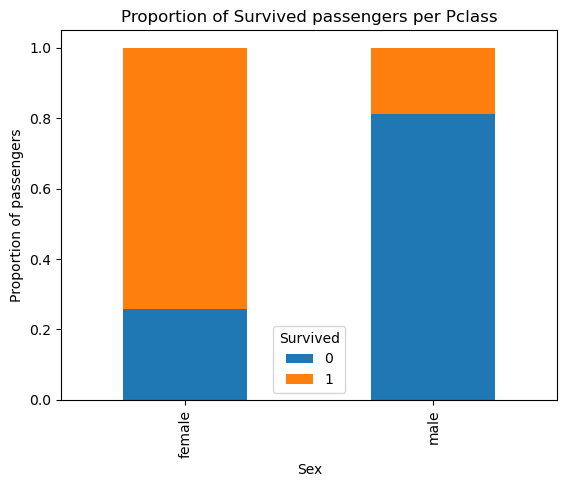

In [21]:
# PclassごとにSurvivedのデータ数を集計
survived_count = df.groupby('Sex')['Survived'].value_counts()
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per  Sex')
plt.ylabel('Proportion of passengers')
plt.show()

In [69]:
df_ag.sort_values(target_col).head(715)
df_ag

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,"(0.0, 10.0]"
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,"(0.0, 10.0]"
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,"(0.0, 10.0]"
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,"(0.0, 10.0]"
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,"(0.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,"(70.0, 80.0]"
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C,"(70.0, 80.0]"
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S,"(70.0, 80.0]"
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S,"(70.0, 80.0]"


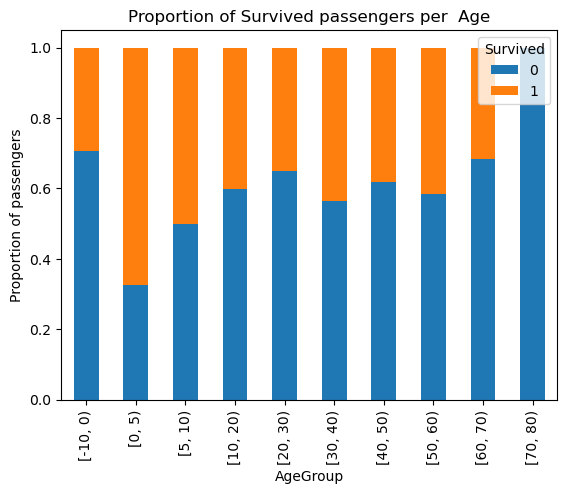

In [124]:
# PclassごとにSurvivedのデータ数を集計
# Ageを年代に集約する
df_ag = df.copy()
df_ag['Age'] = df_ag['Age'].fillna( -5)
#df_ag['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[' 00代', '10代', '20代', '30代', '40代', '50代', '60代', '70代', '80代以上'])
df_ag['AgeGroup'] = pd.cut(df_ag['Age'], bins=[-10, 0, 5, 10, 20, 30, 40, 50, 60, 70, 80], right=False)
df_ag

target_col = "Age"
df_ag.sort_values(target_col).head(600)

survived_count = df_ag.groupby('AgeGroup')['Survived'].value_counts()
survived_ratio = survived_count.unstack().apply(lambda x: x/x.sum(), axis=1)

# 棒グラフで表示
survived_ratio.plot(kind='bar', stacked=True)
#survived_count.plot(kind='bar', stacked=True)
plt.title('Proportion of Survived passengers per  Age')
plt.ylabel('Proportion of passengers')
plt.show()

In [98]:
# 敬称（Title）の抽出関数を定義
def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

df_title = df.copy()
df_title["title"] = df['Name'].apply(extract_title)

df_title["title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [82]:
df_ag.sort_values(target_col).tail(600)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,"(20.0, 30.0]"
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q,"(20.0, 30.0]"
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,"(20.0, 30.0]"
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S,"(20.0, 30.0]"
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,"(20.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,561,0,3,"Morrow, Mr. Thomas Rowan",male,89.0,0,0,372622,7.7500,NaN,Q,NaN
552,553,0,3,"O'Brien, Mr. Timothy",male,89.0,0,0,330979,7.8292,NaN,Q,NaN
547,548,1,2,"Padro y Manent, Mr. Julian",male,89.0,0,0,SC/PARIS 2146,13.8625,NaN,C,NaN
573,574,1,3,"Kelly, Miss. Mary",female,89.0,0,0,14312,7.7500,NaN,Q,NaN


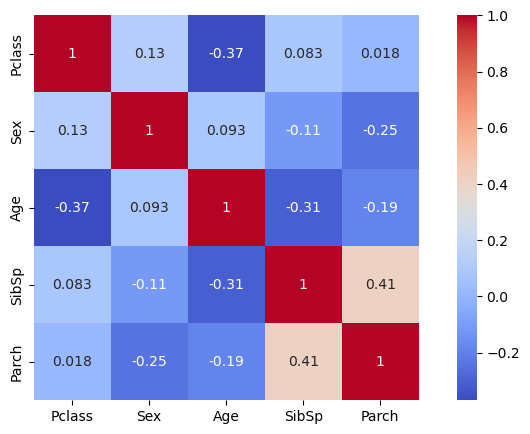

In [36]:
df4corr = df[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].copy()
# sexカラムの値を変換する
df4corr['Sex'] = df4corr['Sex'].replace({'male': 1, 'female': 0})


corr=df4corr .corr()
plt.figure(figsize=(10,5))
ax = sns.heatmap(corr,annot=True,cmap='coolwarm')
ax.set_aspect('equal')

In [32]:
df4corr

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0
...,...,...,...,...,...
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0


## いったん予測する

In [141]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [165]:
# 特徴量とターゲット変数を設定する

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

cats = ['Sex', 'Ticket', 'Cabin', 'Embarked']
for c in cats:
    df[c] = df[c].astype('category')

    
X = df[features]
y = df[target]
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
# LightGBMのデータセットに変換する
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)

# ハイパーパラメータを設定する（適宜調整してください）
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

# LightGBMモデルを訓練する
model = lgb.train(params, train_data, num_boost_round=100)

# テストデータを予測する
y_pred = model.predict(X_test)
y_pred_binary = [round(value) for value in y_pred]

# 正解率を評価する
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)
"""

'\n# LightGBMのデータセットに変換する\ntrain_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)\n\n# ハイパーパラメータを設定する（適宜調整してください）\nparams = {\n    \'objective\': \'binary\',\n    \'metric\': \'binary_logloss\',\n    \'boosting_type\': \'gbdt\',\n    \'num_leaves\': 31,\n    \'learning_rate\': 0.05,\n    \'feature_fraction\': 0.9,\n    \'bagging_fraction\': 0.8,\n    \'bagging_freq\': 5,\n    \'verbose\': 0,\n    \'random_state\': 42\n}\n\n# LightGBMモデルを訓練する\nmodel = lgb.train(params, train_data, num_boost_round=100)\n\n# テストデータを予測する\ny_pred = model.predict(X_test)\ny_pred_binary = [round(value) for value in y_pred]\n\n# 正解率を評価する\naccuracy = accuracy_score(y_test, y_pred_binary)\nprint("Accuracy:", accuracy)\n'

In [53]:



X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2,random_state=0)

# パラメータの準備
params = {
    'boosting_type':'gbdt',
    'objective':'binary',
#    'metric':'auc',
    'metric': 'binary_logloss',
    'num_leaves':16,
    'learning_rate':0.1,
    'n_estimators':100000,
    'random_state':0
}

# インスタンスの作成
clf = lgb.LGBMClassifier(**params)

# モデルの学習
clf.fit(
    X_train, 
    y_train,
    eval_set = [(X_train, y_train),(X_validation, y_validation)],
    early_stopping_rounds=100)


clf.best_iteration_

/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	training's binary_logloss: 0.619463	valid_1's binary_logloss: 0.622777
[2]	training's binary_logloss: 0.582443	valid_1's binary_logloss: 0.587348
[3]	training's binary_logloss: 0.552014	valid_1's binary_logloss: 0.559664
[4]	training's binary_logloss: 0.526652	valid_1's binary_logloss: 0.536738
[5]	training's binary_logloss: 0.504667	valid_1's binary_logloss: 0.515883
[6]	training's binary_logloss: 0.486162	valid_1's binary_logloss: 0.499421
[7]	training's binary_logloss: 0.469792	valid_1's binary_logloss: 0.486339
[8]	training's binary_logloss: 0.455443	valid_1's binary_logloss: 0.472783
[9]	training's binary_logloss: 0.442843	valid_1's binary_logloss: 0.462463
[10]	training's binary_logloss: 0.428948	valid_1's binary_logloss: 0.4511
[11]	training's binary_logloss: 0.416552	valid_1's binary_logloss: 0.442265
[12]	training's binary_logloss: 0.406018	valid_1's binary_logloss: 0.434862
[13]	training's binary_logloss: 0.396492	valid_1's binary_logloss: 0.427562
[14]	training's binary_

[130]	training's binary_logloss: 0.174479	valid_1's binary_logloss: 0.432245
[131]	training's binary_logloss: 0.173798	valid_1's binary_logloss: 0.432579
[132]	training's binary_logloss: 0.173064	valid_1's binary_logloss: 0.434439
[133]	training's binary_logloss: 0.172398	valid_1's binary_logloss: 0.434137
[134]	training's binary_logloss: 0.171924	valid_1's binary_logloss: 0.434568
[135]	training's binary_logloss: 0.17119	valid_1's binary_logloss: 0.4372
[136]	training's binary_logloss: 0.170599	valid_1's binary_logloss: 0.437032
[137]	training's binary_logloss: 0.169957	valid_1's binary_logloss: 0.438028
[138]	training's binary_logloss: 0.169134	valid_1's binary_logloss: 0.439513
[139]	training's binary_logloss: 0.168445	valid_1's binary_logloss: 0.438714
[140]	training's binary_logloss: 0.16779	valid_1's binary_logloss: 0.438461
[141]	training's binary_logloss: 0.167185	valid_1's binary_logloss: 0.439116
[142]	training's binary_logloss: 0.166521	valid_1's binary_logloss: 0.439584
[14

51

In [169]:
# 正解率を評価する
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

for feat, imp in zip(features, clf.feature_importances_):
    print(feat, "\t", imp)

Accuracy: 0.8268156424581006
Pclass 	 39
Sex 	 44
Age 	 286
SibSp 	 36
Parch 	 21
Ticket 	 0
Fare 	 291
Cabin 	 0
Embarked 	 48


In [158]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df["Cabin"].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

# データの前処理

In [94]:
# CSVファイルの読み込み
data_file = "./../titanic/train.csv"
df = pd.read_csv(data_file)

# CSVファイルの読み込み
test_file = "./../titanic/test.csv"
df_test = pd.read_csv(test_file)


In [82]:
# 特徴量とターゲット変数を設定する
def preprocess1(df):
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    target = 'Survived'

    cats = ['Sex', 'Ticket', 'Cabin', 'Embarked']
    for c in cats:
        df[c] = df[c].astype('category')
        
    return df, features, target

df_p, features, target = preprocess1(df)
df_p.head()

X = df_p[features]
y = df_p[target]
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2,random_state=0)

In [160]:
def extract_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

def preprocess2(df):
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
    features = ["Pclass", "Sex", "AgeGroup", "FamilySize", "Ticket", "FareGroup", "CabinGroup", "Embarked", "Title"]
    features = ["AgeGroup", "FamilySize", "FareGroup", "CabinGroup", "Embarked", "Title"]

    target = 'Survived'
    # Age Group
    set_bins = [-10, 0, 5, 10, 20, 30, 40, 50, 60, 70, 80]
    bin_labels = ["None", "0-5", "5-10", "10代", "20代", "30代", "40代", "50代", "60代", "70代"]
    df['AgeGroup'] = pd.cut(df["Age"], bins = set_bins, labels = bin_labels, right=False)
    
    # Family Size 
    df["FamilySize"] = df['SibSp'] + df['Parch']
    
    # Fare 
    set_bins = [-1, 7, 10, 20, 50, 100, 1000]
    bin_labels = ["lower", "low", "mid-low", "mid-high", "high", "higher"]
    df['FareGroup'] = pd.cut(df["Fare"], bins = set_bins, labels = bin_labels)
    
    # Cabin 
    df['CabinGroup'] = df['Cabin'].isna()
    # Title 
    df["Title"] = df['Name'].apply(extract_title)
    
    cats = ['Sex', 'Ticket', 'Cabin', 'Embarked', "AgeGroup", "FareGroup", "CabinGroup", "Title"]
    for c in cats:
        df[c] = df[c].astype('category')
        
    return df, features, target

#前処理の実行
df_p, features, target = preprocess2(df)
df_p.head()
pas_id = df_test["PassengerId"].values
df_test_p, features, _ = preprocess2(df_test)

X = df_p[features]
y = df_p[target]
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2,random_state=0)




In [47]:
#!pip install optuna
import optuna
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import optuna.integration.lightgbm as olgb
    

# Light GBM

In [83]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,3,female,NaN,0,2,2678,15.2458,NaN,C
439,2,male,31.0,0,0,C.A. 18723,10.5000,NaN,S
817,2,male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
378,3,male,20.0,0,0,2648,4.0125,NaN,C
491,3,male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
...,...,...,...,...,...,...,...,...,...
835,1,female,39.0,1,1,PC 17756,83.1583,E49,C
192,3,female,19.0,1,0,350046,7.8542,NaN,S
629,3,male,NaN,0,0,334912,7.7333,NaN,Q
559,3,female,36.0,1,0,345572,17.4000,NaN,S


In [161]:
def get_data():
    return X_train, X_validation, y_train, y_validation, X_test

def objective(trial):
    X_train, X_val, y_train, y_val, X_test = get_data()
    
    params_dist = {
        'boosting'          : 'gbdt',
        'metric'            : 'auc',
        'objective'         : 'binary',
        'learning_rate'     : 0.05,
        'lambda_l1'         : trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2'         : trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        
        'num_leaves'        :   trial.suggest_int('num_leaves', 2, 64, 4),
        'max_depth'         :   trial.suggest_int('max_depth', 3, 7),
        'min_data_in_leaf':  trial.suggest_int('min_data_in_leaf', 10, 40, 10),
        
        'feature_fraction'  : trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction'  : trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq'      : trial.suggest_int('bagging_freq', 0, 10),
        'min_child_samples' : trial.suggest_int('min_child_samples', 5, 100),
        'seed'              : 42,
        'verbosity'         : -1,
    }
    
    lgb_train = olgb.Dataset(X_train, y_train)
    lgb_eval  = olgb.Dataset(X_val, y_val, reference=lgb_train)

    evaluation_results = {}
    model = olgb.train(params_dist,
                      lgb_train,
                      valid_sets=(lgb_train, lgb_eval),
                      valid_names=["Train", "Test"],
                      num_boost_round=100000,
                      callbacks=[olgb.early_stopping(100), 
                                        olgb.log_evaluation(),
                                        olgb.record_evaluation(evaluation_results)]
                      )
    
    y_prob_val = model.predict(X_val, num_iteration=model.best_iteration)
    y_pred_val = np.round(y_prob_val)

    score = roc_auc_score(np.round(y_val.values), np.round(y_pred_val))
    return score 

In [162]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


In [163]:
print(study.best_params, study.best_value)

In [167]:
##パラメータの準備
params = {
    'boosting_type':'gbdt',
    'objective':'binary',
#    'metric':'auc',
    'metric': 'binary_logloss',
    'num_leaves':16,
    'learning_rate':0.1,
    'n_estimators':100000,
    'random_state':0
}

params = study.best_params
# インスタンスの作成
model = lgb.LGBMClassifier(**params)

# モデルの学習
model.fit(
    X_train, 
    y_train,
    eval_set = [(X_train, y_train),(X_validation, y_validation)],
    early_stopping_rounds=100)




[LightGBM] [Warning] lambda_l1 is set=0.0008232778554706399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008232778554706399
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] feature_fraction is set=0.9436122863511679, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9436122863511679
[LightGBM] [Warning] bagging_fraction is set=0.6405478732474104, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6405478732474104
[LightGBM] [Warning] lambda_l2 is set=0.01580329513154596, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01580329513154596
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[1]	training's binary_logloss: 0.630614	valid_1's binary_logloss: 0.633215
[2]	training's binary_logloss: 0.60177	valid_1's binary_logloss: 0.606558
[3]	training's binary_logloss: 0.578779	valid_

/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/ryuku.nobusue/miniforge3/envs/my_env/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


LGBMClassifier(bagging_fraction=0.6405478732474104, bagging_freq=3,
               feature_fraction=0.9436122863511679,
               lambda_l1=0.0008232778554706399, lambda_l2=0.01580329513154596,
               max_depth=4, min_child_samples=5, min_data_in_leaf=30,
               num_leaves=30)

In [168]:
# 正解率を評価する

# params = model.get_params(iteration = clf.best_iteration_)
# model = lgb.LGBMRegressor()
# model.set_params(**params)

y_pred = model.predict(X_test)
y_pred_binary = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

for feat, imp in zip(features, model.feature_importances_):
    print(feat, "\t", imp)
    
    


Accuracy: 0.8547486033519553
AgeGroup 	 274
FamilySize 	 124
FareGroup 	 164
CabinGroup 	 62
Embarked 	 75
Title 	 41


In [166]:
 study.best_params

{'lambda_l1': 0.0008232778554706399,
 'lambda_l2': 0.01580329513154596,
 'num_leaves': 30,
 'max_depth': 4,
 'min_data_in_leaf': 30,
 'feature_fraction': 0.9436122863511679,
 'bagging_fraction': 0.6405478732474104,
 'bagging_freq': 3,
 'min_child_samples': 5}

In [89]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,3,male,NaN,1,1,2661,15.2458,NaN,C
439,2,male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,3,male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,2,female,6.0,0,1,248727,33.0000,NaN,S
39,3,female,14.0,1,0,2651,11.2417,NaN,C
...,...,...,...,...,...,...,...,...,...
433,3,male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
773,3,male,NaN,0,0,2674,7.2250,NaN,C
25,3,female,38.0,1,5,347077,31.3875,NaN,S
84,2,female,17.0,0,0,SO/C 14885,10.5000,NaN,S


In [88]:
df_test_p

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [169]:
# pas_id = df_test["PassengerId"].values
# df_test_p, features, _ = preprocess1(df_test)
import time

y_pred = model.predict(df_test_p[features])
y_pred_binary = [round(value) for value in y_pred]


data = {
    "PassengerId": pas_id,
    'Survived': y_pred_binary
}
df_sub = pd.DataFrame(data)

# データフレームをCSVファイルに書き込む
timestamp = time.strftime("%Y-%m-%d_%H:%M:%S", time.localtime())
df_sub.to_csv('./../results/output_{}.csv'.format(timestamp), index=False)

# XGBoost

# Random Forest